In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio as iio

In [6]:
from os import listdir
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from joblib import Parallel, delayed
from skimage import feature
from patchify import patchify


In [57]:
filename = str(input())
path = 'Braile Dataset\\' + filename

z1.JPG18dim.jpg


# Pré-Processamento
Nessa etapa vamos pegar a imagem lida na celula anterior, deixa-la cinza e binarizar a imagem


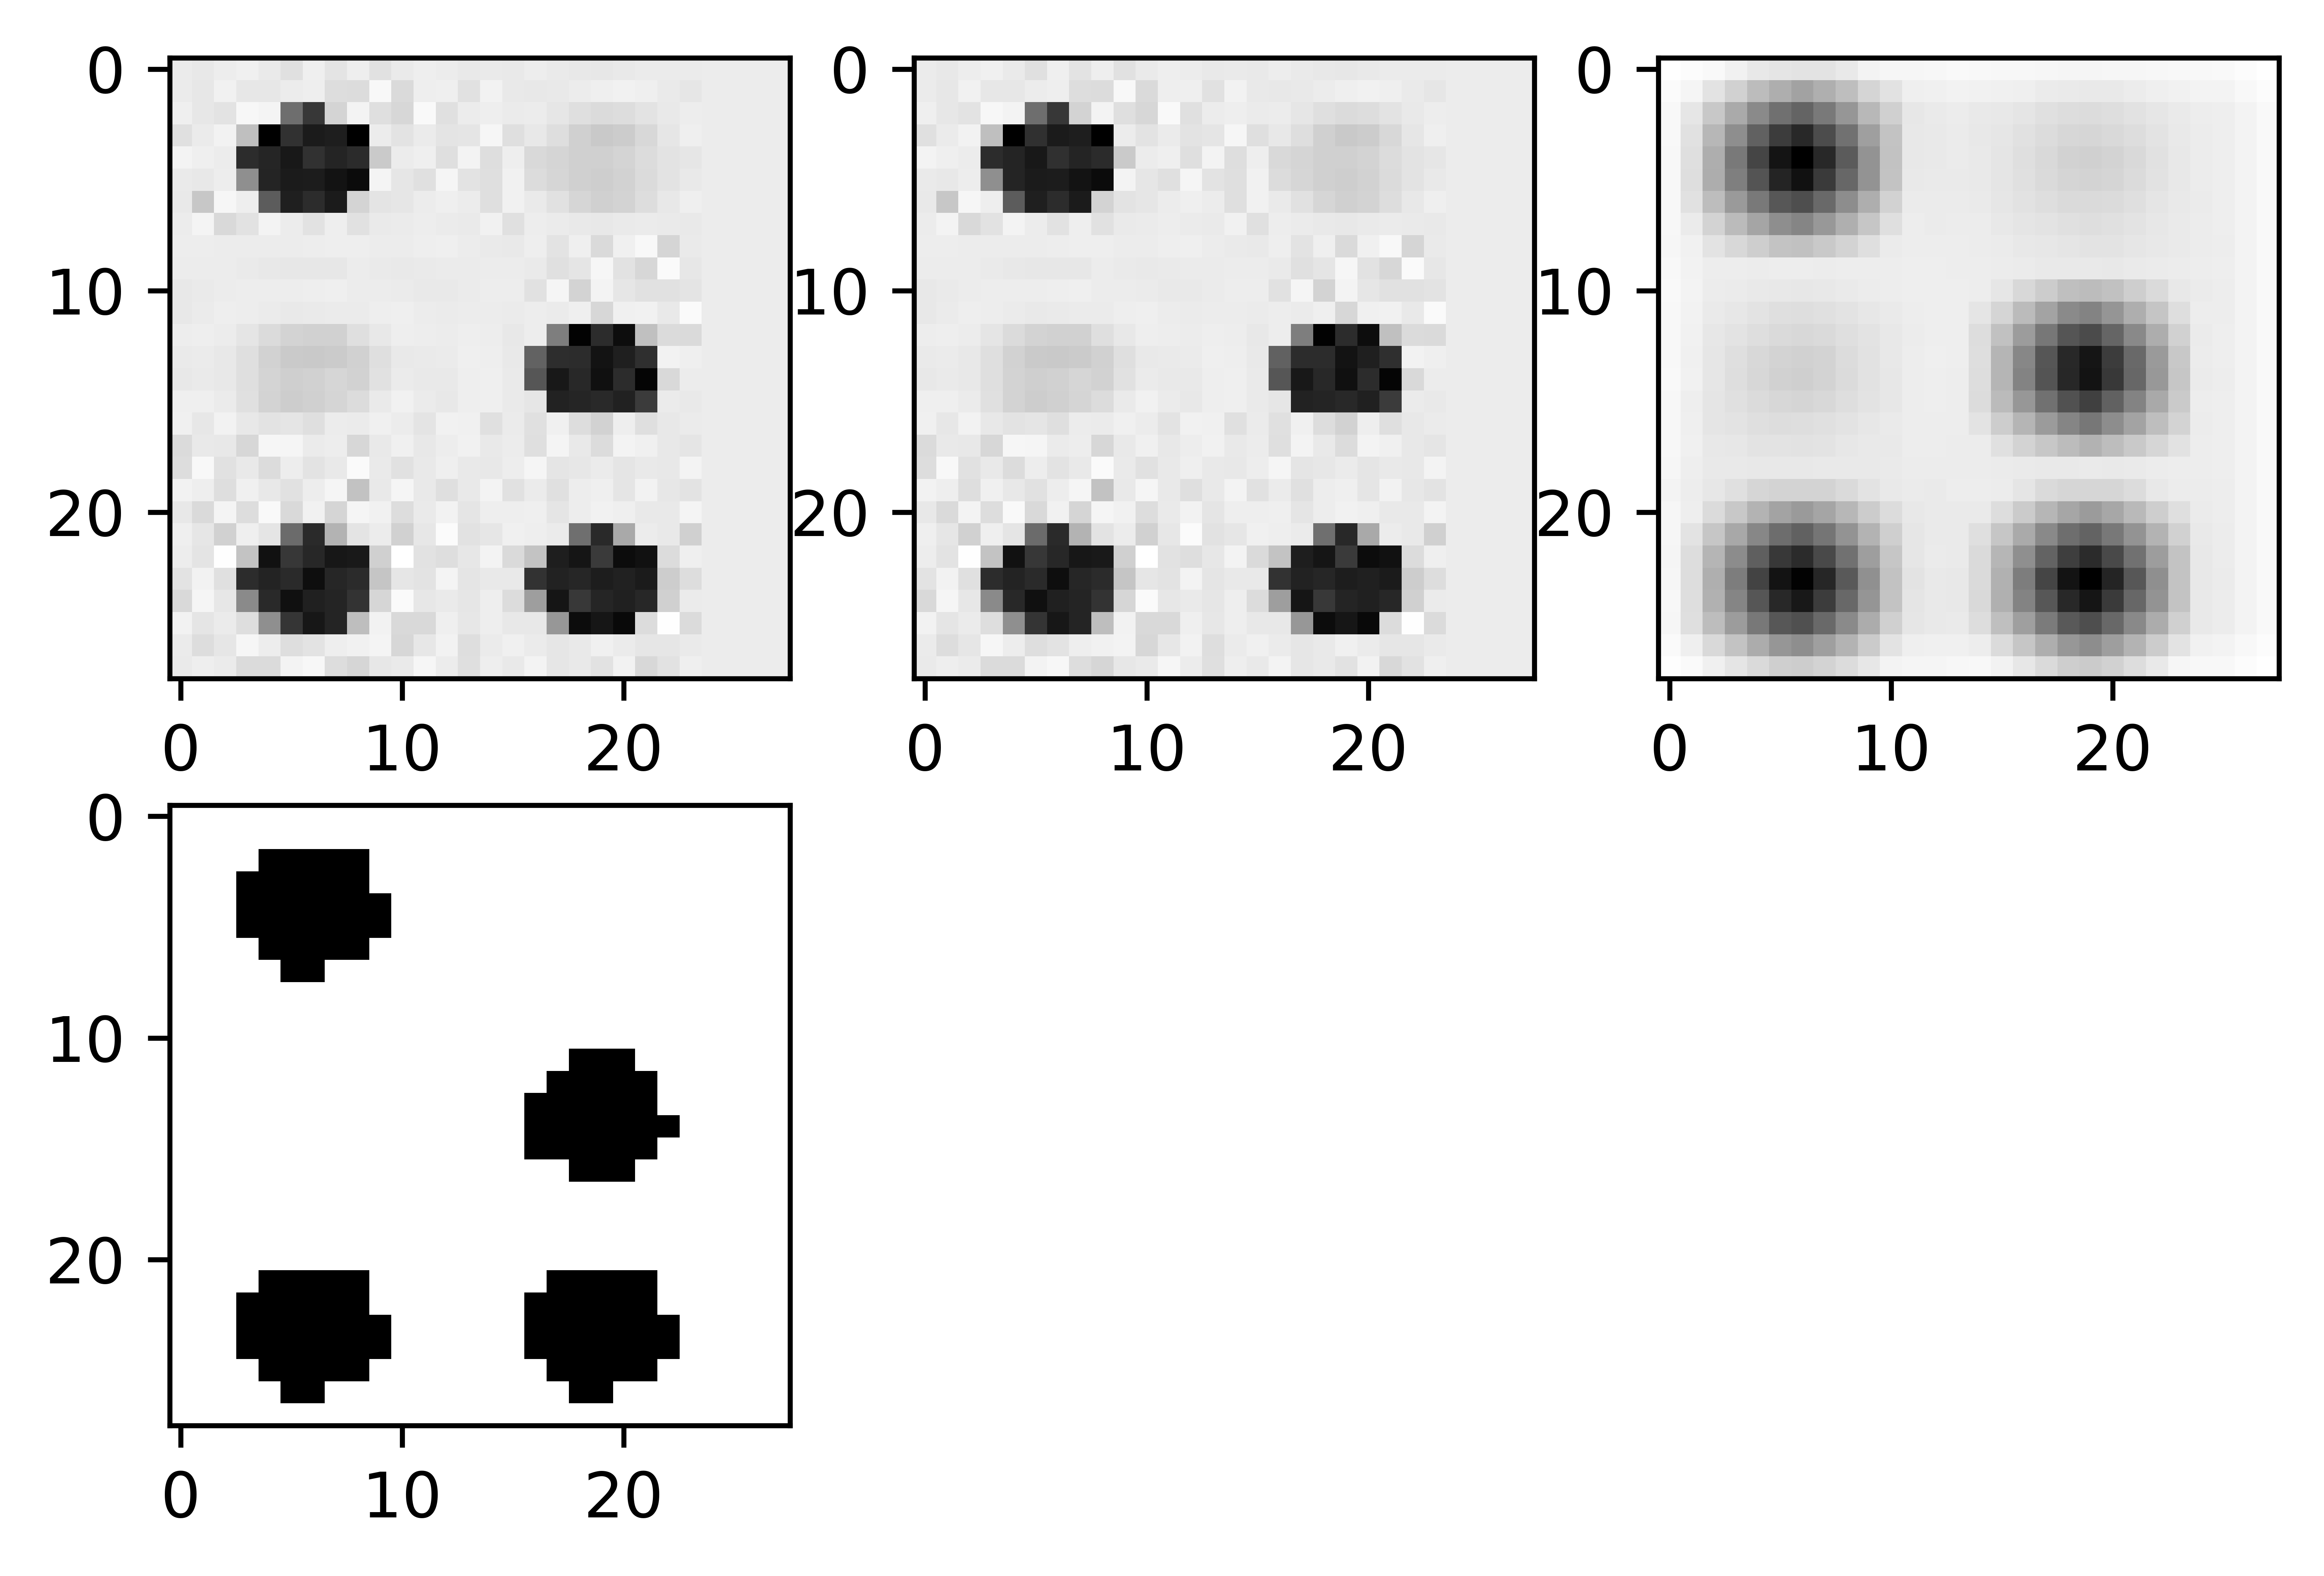

In [58]:
#Tasks

def meanFilter(img, filter_size):
    
    x = img.shape[0]
    y = img.shape[1]
    
    pad_size = np.int(((filter_size - 1) / 2))
    
    img_pad = np.pad(img, (pad_size, pad_size), constant_values = 255)

    for i in range (x):
        for j in range(y):
            img[i, j] = img_pad[i: i + filter_size,j: j + filter_size].sum()/img_pad[i: i + filter_size,j : j + filter_size].size 
            
    return img

def medianFilter(img, filter_size):
    
    x = img.shape[0]
    y = img.shape[1]
    
    pad_size = np.int(((filter_size - 1) / 2))
    
    img_pad = np.pad(img, (pad_size, pad_size), constant_values = 255)

    for i in range (x):
        for j in range(y):
            W = np.sort(img_pad[i: i + filter_size,j: j + filter_size].flatten())
            img[i,j] = np.median(W)
            
    return img            
            
# Normalização min max
def min_max(img):
    min = np.amin(img)
    max = np.amax(img)
    
    img_res = (img - min)/(max - min)
    
    return img_res;

#Abre a imagem
img_src = iio.imread(path)

# Usar filtro para reduzir barulho

plt.figure(dpi=1200)
plt.subplot(231)
plt.imshow(img_src, cmap = "gray")

def Luminance(img):
    img = np.array(img, copy=True).astype(float)
    # computing conversion
    new_img = np.zeros((img.shape[0], img.shape[1]))
    new_img = img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114
    new_img = min_max(new_img)
    
    return new_img

img_gray = Luminance(img_src)

img_gray = min_max(img_gray)
img_gray = (img_gray*255)

plt.subplot(232)
plt.imshow(img_gray, cmap = "gray")

img_filtered = meanFilter(img_gray,5)

plt.subplot(233)
plt.imshow(img_filtered, cmap = "gray")

def Binarize(img, T):
    return np.where(img > T, 1, 0);

img_bin = Binarize(img_filtered, 175)

plt.subplot(234)
plt.imshow(img_bin, cmap = "gray")


In [46]:
#Potencial problema, imagens não tem a mesma dimensao, reshape pode dar errado
#Seria legal com base na imagem binarizada gerar um nova imagem com um circulo melhor e na escala desejada
# Escala desejada = Escala das imagens no dicionario
def euclidian_Distance(img_test, img_dict):
    return np.sqrt(np.sum(np.square(img_test - img_dict)))



for 

    